# Lab 04 : Train vanilla neural network -- demo


# Training a one-layer net on MNIST

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'train_vanilla_nn_demo.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/CS5242_2021_codes/codes/labs_lecture03/lab04_train_vanilla_nn'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### randint(a,b) returns a random integer between a and b: 

In [3]:
idx=randint(5,10) # generate an integer randomly from 5 to 10 included.

print(idx)

7


### Download the TRAINING SET (data+labels)

In [4]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

In [5]:
train_data=torch.load(data_path+'mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [6]:
train_label=torch.load(data_path+'mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


### Download the TEST SET (data only)

In [7]:
test_data=torch.load(data_path+'mnist/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [8]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        
        x = self.linear_layer(x)
        p = torch.softmax(x, dim=1)
        return p

### Build the net

In [9]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Take the 6th image of the test set:

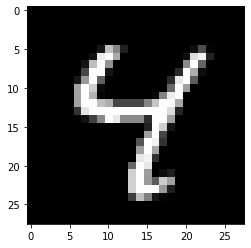

In [10]:
im=test_data[6]
utils.show(im)

### And feed it to the UNTRAINED network:

In [11]:
p =  net( im.view(1,784) ) 
print(p)

tensor([[0.0918, 0.0799, 0.1063, 0.1180, 0.0793, 0.1115, 0.1153, 0.0940, 0.0969,
         0.1069]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

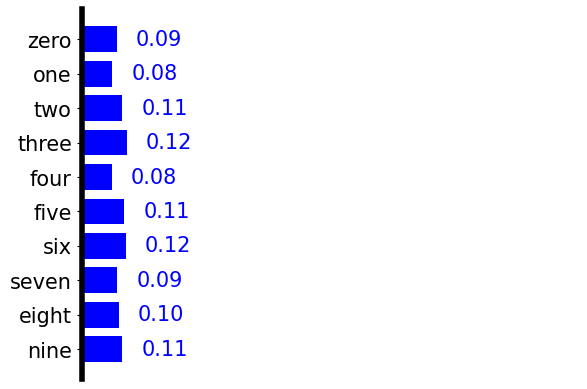

In [12]:
utils.show_prob_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [13]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network
    idx=randint(0, 60000-1)
    input=train_data[idx].view(1,784)
    label=train_label[idx].view(1)


    # feed the input to the net  
    input.requires_grad_()
    prob=net(input) 
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 6th image of the test set:

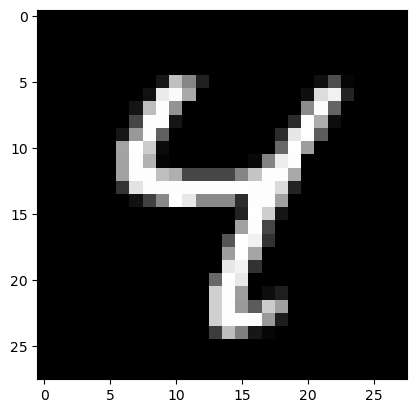

In [14]:
im=test_data[6]
utils.show(im)

### Feed it to the TRAINED net:

In [15]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[3.4201e-04, 2.1674e-04, 3.3178e-04, 6.7213e-03, 7.0020e-01, 6.6233e-02,
         1.7989e-03, 5.0169e-02, 8.5250e-02, 8.8736e-02]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

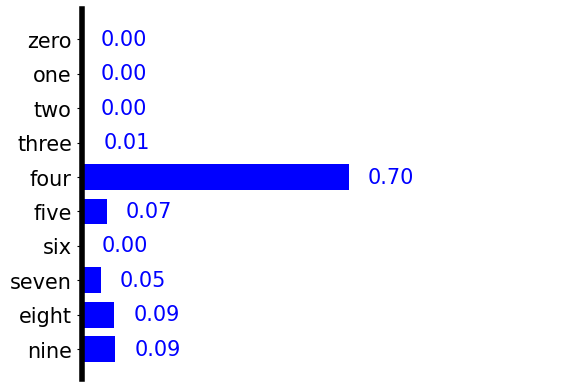

In [16]:
utils.show_prob_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

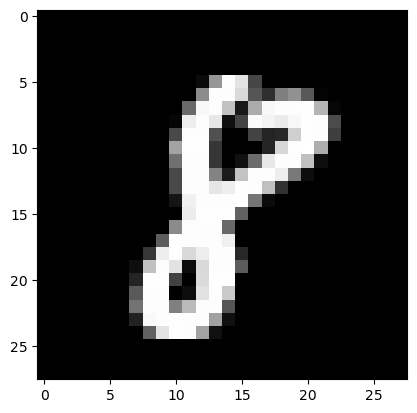

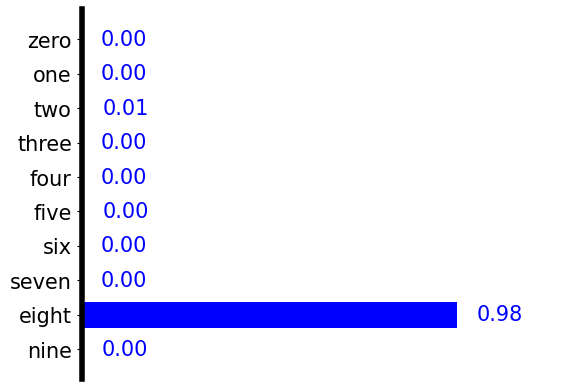

In [17]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_mnist(prob)